<div class="alert alert-block alert-warning">
<font size="5">
<b>Important Notes</b></font><br>
<br>
<font size="4">
<ul>
  <li>File names should follow the format: HWX_StudentID_Name, where X is the assignment number.</li>
    <br>
  <li>Please upload it to NTHU eeclass and be awared of the deadline.</li>
    <br>
  <li>Late submissions are generally not accepted, and a late submission will result in a score of 0. If there are any special circumstances, please contact the instructor for clarification.</li>
    <br>
  <li>Plagiarism is strictly prohibited (whether copying from others, the internet, or books). If any references are used, they must be properly cited. Both the plagiarizer and the source of the plagiarism will receive a score of 0. Allowing someone else to copy your assignment is not helping but harming them.</li>
    <br>
  <li>Code should be written in the "Python Cell" below the question, with comments if needed. If responses to questions and interpretations of results are needed, they should be written in the "Markdown Cell" below the Python cell.</li>
</ul>
</font>
</div>

# 1. (50%) Chemical kinetics
Chemical kinetics is essential to chemical engineers. Actually, there is a required course called Chemical Reaction Engineering 化學反應工程 for all 3rd grade students in our department. In this question, let's consider some classic chemical kinetics and plot the concentration of each chemical species as a function of time.

(a) (5%) Consider the following irreversible equation:

$$ A \xrightarrow{\text{k}} B$$

Assuming that the initial concentration of $A$ is $[A]_0$ and there is no $B$ at the beginning. The time evolution of concentration of A and B can be solved analytically:

$$ [A] = [A]_0exp(-kt) $$
$$ [B] = [A]_0[1-exp(-kt)] $$

Please plot the concentration of A and B in the same figure. Set $[A]_0$ and $k$ to be 1. 

You shall get something like:
<p align="center">
    <img src="https://i.imgur.com/ZfJBQvR.png" width="500">
</p>

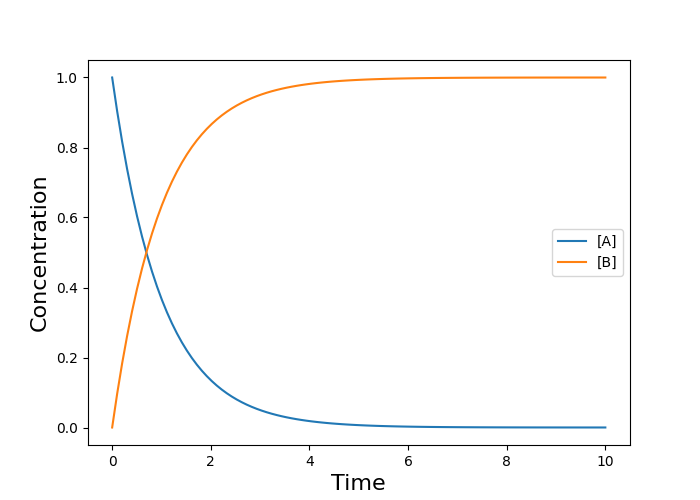

In [25]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

A0 = 1 
k = 1  
t = np.linspace(0, 10, 100)  

A = A0 * np.exp(-k * t)  
B = A0 * (1 - np.exp(-k * t)) 

plt.figure(figsize=(7, 5))
plt.plot(t, A, label='[A]', color='#2178b5')
plt.plot(t, B, label='[B]', color='#ff8111')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.legend()
plt.show()

(b) (10%) Consider the same reaction but now we try to solve it in an iterative manner. In general, we can update both of their concentrations step by step:

- Assign the initial concentration for A and B ($[A]_0$ and $[B]_0$)
- Set up the time step $dt$ (should be small enough)
- Determine how many steps you want to evolve ($N$)
- Calculate the concentration change after $dt$
$$ d[A] = -k_f[A]_{now}dt$$
$$ d[B] = k_f[A]_{now}dt$$
- Update these changes
$$ [A]_{new} = [A]_{now} + d[A] $$
$$ [B]_{new} = [B]_{now} + d[B] $$
- Do this iteratively until the target number of steps reach!

Please define a function evolution(A0,B0,dt,N,k) that implements the aformentioned workflow, where
- A0, B0 are the initial concentrations
- dt is the step size
- N is the number of steps
- k is the reaction rate

And make a scatter plot the concentration of A and B as a function of time in the same figure. Set 
- $[A]_0$, $[B]_0$ to be 1 and 0
- $k$ to be 1.0
- dt to be 0.01
- N to be 1000  


In addition, make a line plot of the analytic solution from (a) in the same figure.

You shall get a figure like this:

<p align="center">
    <img src="https://i.imgur.com/mdzVA0r.png" width=500>
</p>

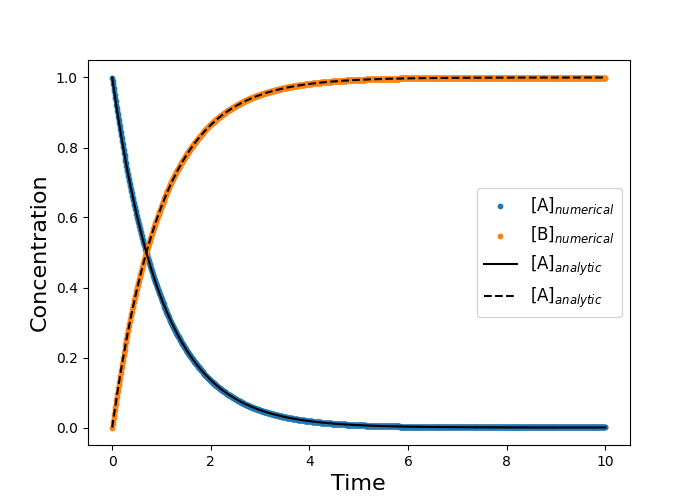

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def evolution(A0, B0, dt, N, k):
    t_values = np.linspace(0, N*dt, N)
    A_values = np.zeros(N)
    B_values = np.zeros(N)
    
    A_values[0] = A0
    B_values[0] = B0
    
    for i in range(1, N):
        dA = -k * A_values[i-1] * dt
        dB = k * A_values[i-1] * dt
        
        A_values[i] = A_values[i-1] + dA
        B_values[i] = B_values[i-1] + dB
    
    return t_values, A_values, B_values

# Initial conditions and parameters
A0, B0 = 1, 0  
k = 1.0  
dt = 0.01 
N = 1000 

# Calculate numerical solution
t_iter, A_iter, B_iter = evolution(A0, B0, dt, N, k)

# Calculateanalytic solution
t_analytic = np.linspace(0, N*dt, 100)
A_analytic = A0 * np.exp(-k * t_analytic)
B_analytic = A0 * (1 - np.exp(-k * t_analytic))

plt.figure(figsize=(7, 5))
plt.scatter(t_iter, A_iter, color='#2178b5', label=r'[A]$_{numerical}$', s=10)
plt.scatter(t_iter, B_iter, color='#ff8111', label=r'[B]$_{numerical}$', s=10)
plt.plot(t_analytic, A_analytic, label=r'[A]$_{analytic}$', color='black', linestyle='-')
plt.plot(t_analytic, B_analytic, label=r'[A]$_{analytic}$', color='black', linestyle='--')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.legend(fontsize=12)
plt.show()


**Slightly challenging**  
(c) (10%) Make a convergence analysis plot of the numerical method we used in (b), which is known as Euler method. What is the slope of the log-log plot?  

Hint: 
- Estimate the mean absolute error versus different sizes of dt
- Make a log-log plot at the end similar to the previous HW
- Use np.polyfit() to determine the slope
- Print the slope

You shall get a plot like:   

<p align="center">
    <img src="https://i.imgur.com/ix9Ry3c.png" width=500>
</p>

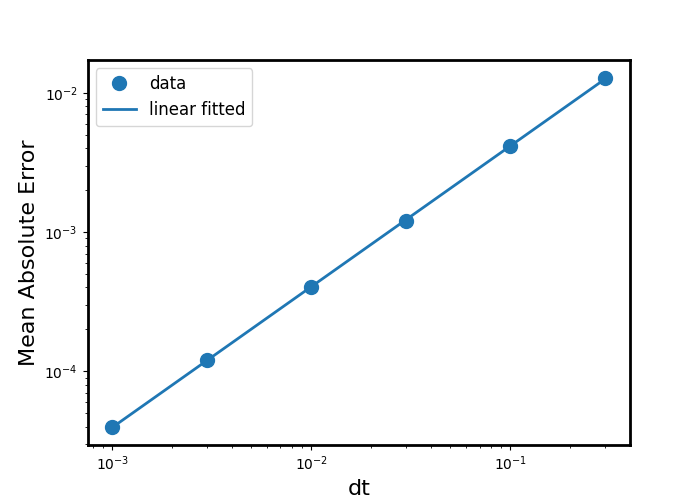

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def evolution(A0, dt, N, k):
    t_values = np.linspace(0, N*dt, N)
    A_values = np.zeros(N)
    A_values[0] = A0
    for i in range(1, N):
        dA = -k * A_values[i-1] * dt
        A_values[i] = A_values[i-1] + dA
    return t_values, A_values

def error(A0, k, dt, N):
    t_iter, A_iter = evolution(A0, dt, N, k) # numerical
    A_analytic = A0 * np.exp(-k * t_iter) # analytic
    MAE = np.mean(np.abs(A_iter - A_analytic)) # mean absolute error
    return MAE

dt_values = np.array([0.3, 0.1, 0.03, 0.01, 0.003, 0.001])
A0, k, N = 1, 1.0, 1000

# calculate MAE for each dt
MAE_values = np.array([error(A0, k, dt, int(N*(0.01/dt))) for dt in dt_values])

# data points
plt.figure(figsize=(7, 5))
plt.loglog(dt_values, MAE_values, 'o', label='data', markersize=10, color = '#1f77b4')

# linear fit
dt_fit = np.linspace(min(dt_values), max(dt_values), 100)
log_dt = np.log(dt_values)
log_MAE = np.log(MAE_values)
slope, intercept = np.polyfit(log_dt, log_MAE, 1)
MAE_fit = np.exp(np.log(dt_fit) * slope + intercept)
plt.loglog(dt_fit, MAE_fit, '-', label='linear fitted', linewidth=2, markersize=10, color = '#1f77b4')

plt.xlabel('dt', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=16)
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

plt.legend(fontsize=12)
plt.show()


(d) (10%) Consider now a similar equation:

$$ A \longleftrightarrow B$$

But this time, let's consider both forward and backward reaction. Let the forward rate be $k_f$ and backward rate to be $k_b$. For any moment, the change of their concentration is:

$$ {d[A] \over dt} = -k_f[A] + k_b[B] $$
$$ {d[B] \over dt} = k_f[A] - k_b[B] $$

In this case, it is less easy to solve it analytically. However, we could easily solve it numerically. In general, we can update both of their concentrations step by step:

- Assign the initial concentration for A and B ($[A]_0$ and $[B]_0$)
- Set up the time step $dt$ (should be small enough)
- Determine how many steps you want to evolve ($N$)
- Calculate the concentration change after $dt$
$$ d[A] = (-k_f[A]_{now} + k_b[B]_{now})dt$$
$$ d[B] = (k_f[A]_{now} - k_b[B]_{now})dt$$
- Update these changes
$$ [A]_{new} = [A]_{now} + d[A] $$
$$ [B]_{new} = [B]_{now} + d[B] $$
- Do this iteratively until the target number of steps reach!

Please define a function evolution(A0,B0,dt,N,kf,kb) that implement the aformentioned workflow, where
- A0, B0 are the initial concentrations
- dt is the step size
- N is the number of steps
- kf, kb are the forward and backward reaction rates

And plot the concentration of A and B as a function of time in the same figure. Set 
- $[A]_0$, $[B]_0$ to be 1 and 0
- $k_f$, $k_b$ to be 1.0 and 0.5
- dt to be 0.01
- N to be 1000

You shall get something like this:

<p align="center">
    <img src="https://i.imgur.com/RSWacSo.png" width=500>
</p>

C:\Users\ewinn\AppData\Local\Temp\ipykernel_49828\4169287731.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 5))


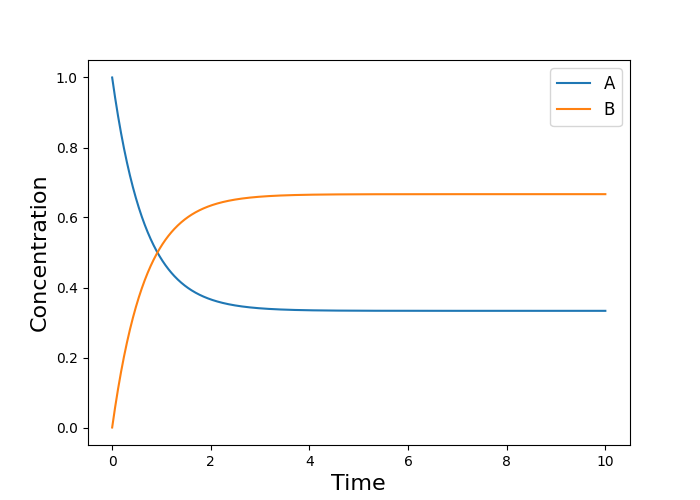

In [21]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def evolution(A0, B0, dt, N, kf, kb):
    t_values = np.linspace(0, N*dt, N)
    A_values = np.zeros(N)
    B_values = np.zeros(N)
    
    A_values[0] = A0
    B_values[0] = B0
    
    for i in range(1, N):
        dA = (-kf * A_values[i-1] + kb * B_values[i-1]) * dt
        dB = (kf * A_values[i-1] - kb * B_values[i-1]) * dt
        
        A_values[i] = A_values[i-1] + dA
        B_values[i] = B_values[i-1] + dB
    
    return t_values, A_values, B_values


A0, B0 = 1, 0 
kf, kb = 1.0, 0.5 
dt = 0.01  
N = 1000 

t_values, A_values, B_values = evolution(A0, B0, dt, N, kf, kb)

plt.figure(figsize=(7, 5))
plt.plot(t_values, A_values, label='A', color='#1f77b4')
plt.plot(t_values, B_values, label='B', color='#ff8111')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.legend(fontsize=12)
plt.show()


(e) (15%) Finally, let's consider a yet more complicated situation:

$$ A \longleftrightarrow B$$
$$ B \rightarrow C$$

where the first reaction is the same as (d) that backward reaction is not negligible. This time, there is an additional irreversible reaction from B to C (rate constant $k$). 

(1) Please first write down the equations of $ {d[A] \over dt} $, $ {d[B] \over dt} $ and $ {d[C] \over dt} $ in a markdown cell.

(2) Write down the relationship between $[X]_{new}$ and $[X]_{now}$ for $X = A, B, C$ in the markdown. This is similar to (d).

(3) Write the code and plot the concentration of A, B and C similar to that of (c). Set 
- $[A]_0$, $[B]_0$, $[C]_0$ to be 1, 0 and 0
- $k_f$, $k_b$, $k$ to be 1.0, 0.5 and 0.7
- dt to be 0.01
- N to be 1000


You shall get something like:

<p align="center">
    <img src="https://i.imgur.com/YqATPNP.png" width=500>
</p>

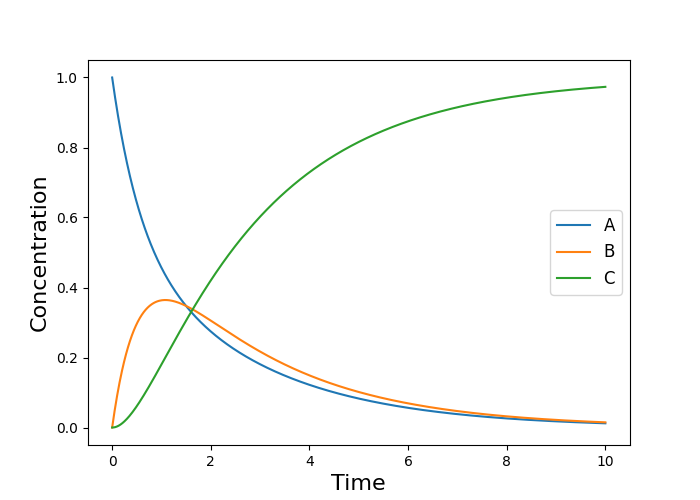

In [23]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def evolution(A0, B0, C0, dt, N, kf, kb, k):
    t_values = np.linspace(0, N*dt, N)
    A_values = np.zeros(N)
    B_values = np.zeros(N)
    C_values = np.zeros(N)
    
    A_values[0] = A0
    B_values[0] = B0
    C_values[0] = C0
    
    for i in range(1, N):
        dA = (-kf * A_values[i-1] + kb * B_values[i-1]) * dt
        dB = (kf * A_values[i-1] - (kb + k) * B_values[i-1]) * dt
        dC = k * B_values[i-1] * dt
        
        A_values[i] = A_values[i-1] + dA
        B_values[i] = B_values[i-1] + dB
        C_values[i] = C_values[i-1] + dC
    
    return t_values, A_values, B_values, C_values

A0, B0, C0 = 1, 0, 0 
kf, kb, k = 1.0, 0.5, 0.7
dt = 0.01  
N = 1000  

t_values, A_values, B_values, C_values = evolution(A0, B0, C0, dt, N, kf, kb, k)

plt.figure(figsize=(7, 5))
plt.plot(t_values, A_values, label='A', color='#1f77b4')
plt.plot(t_values, B_values, label='B', color='#ff8111')
plt.plot(t_values, C_values, label='C', color='#2da02c')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Concentration', fontsize=16)
plt.legend(fontsize=12)
plt.show()


# 2. (50%) Moment of inertia and inertia matrix
In the Year 1 General Physics course, you've learned the concept of the moment of inertia to describe the rotational motion of a rigid body. As a quick recap, the moments of inertia of rigid bodies with different shapes are summrized in the figure below.

<p align="center">
    <img src="http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/mic.png" width=500>
</p>

For cases where the mass is not uniformly distributed, such as a molecule, we could calculate their inertia matrix, defined as:

$$
I = \left(\begin{array}{cc} 
I_{xx} & I_{xy} & I_{xz}\\
I_{yx} & I_{yy} & I_{yz}\\
I_{zx} & I_{zy} & I_{zz}\\
\end{array}\right)
$$
The diagonal terms are defined as:
$$
I_{xx}=\sum_{i} m_i[(y_i-y_{com})^2+(z_i-z_{com})^2]\\
I_{yy}=\sum_{i} m_i[(z_i-z_{com})^2+(x_i-x_{com})^2]\\
I_{zz}=\sum_{i} m_i[(x_i-x_{com})^2+(y_i-y_{com})^2]\\
$$
while the off-diagonal terms are:
$$
I_{xy}=I_{yx}=-\sum_{i} m_i(x_i-x_{com})(y_i-y_{com})\\
I_{yz}=I_{zy}=-\sum_{i} m_i(y_i-y_{com})(z_i-z_{com})\\
I_{zx}=I_{xz}=-\sum_{i} m_i(z_i-z_{com})(x_i-x_{com})\\
$$

where $i$ is the index of the atom in a molecule, $x_i, y_i, z_i$ are the cartesian coordinates of the atom and $x_{com}, y_{com}, z_{com}$ is the center of mass of the molecule.

(a) (10%) Please define a function read(filename). The input argument is the name of the file that contains the cartesian coordinates of a molecule in xyz format. And it returns two arrays:
1. array that stores the coordinates in the following format:
```python
[['x1' 'y1' 'z1']
 ['x2' 'y2' 'z2']
...
 ['xN' 'yN' 'zN']]
```
2. array that stores the element symbols
```python
['C' 'C' 'C' ... 'H']
```
The xyz file is of the following format:
```python
2                   ##The number of atoms in the molecule
H2                  ##The title or comment of this file
H  0.0  0.0  0.0    ##Information of the 1st atom in the format: element  x1  y1  z1
H  0.0  0.0  0.7    ##Information of the 2nd atom in the format: element  x2  y2  z2
```
Please test your file with the benzene.xyz file provided together with the HW6 on eeclass. You shall get something like:
```python
[[-1.998860e+00  8.676920e+00 -1.028790e+00]
 [-8.160300e-01  9.242180e+00 -1.498960e+00]
 [ 6.490000e-03  8.520280e+00 -2.360340e+00]
 [-3.538200e-01  7.233110e+00 -2.751540e+00]
 [-1.536640e+00  6.667850e+00 -2.281370e+00]
 [-2.359160e+00  7.389760e+00 -1.420000e+00]
 [-2.608340e+00  9.211850e+00 -3.905100e-01]
 [-5.490500e-01  1.019597e+01 -1.209080e+00]
 [ 8.829600e-01  8.939130e+00 -2.708730e+00]
 [ 2.556700e-01  6.698180e+00 -3.389820e+00]
 [-1.803630e+00  5.714070e+00 -2.571250e+00]
 [-3.235630e+00  6.970900e+00 -1.071600e+00]]
['C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H']
```

In [23]:
import numpy as np

def read(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        ele = []
        coord = []
        for line in lines[2:]:  # Skip first two lines
            parts = line.split()
            element = parts[0]
            coords = np.array([float(part) for part in parts[1:]])
            
            ele.append(element)
            coord.append(coords)
    
    # Convert lists to numpy arrays
    e_array = np.array(ele)
    p_array = np.array(coord)
    
    return p_array, e_array

coord, ele = read('benzene.xyz')

print(coord)
print(ele)


[[-1.998860e+00  8.676920e+00 -1.028790e+00]
 [-8.160300e-01  9.242180e+00 -1.498960e+00]
 [ 6.490000e-03  8.520280e+00 -2.360340e+00]
 [-3.538200e-01  7.233110e+00 -2.751540e+00]
 [-1.536640e+00  6.667850e+00 -2.281370e+00]
 [-2.359160e+00  7.389760e+00 -1.420000e+00]
 [-2.608340e+00  9.211850e+00 -3.905100e-01]
 [-5.490500e-01  1.019597e+01 -1.209080e+00]
 [ 8.829600e-01  8.939130e+00 -2.708730e+00]
 [ 2.556700e-01  6.698180e+00 -3.389820e+00]
 [-1.803630e+00  5.714070e+00 -2.571250e+00]
 [-3.235630e+00  6.970900e+00 -1.071600e+00]]
['C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H']


(b) (10%) Please define a function COM(filename). The input is again the name of the file that contains the cartesian coordinates of a molecule in xyz format. And it returns an array that stores the coordinates of the center of mass of the molecule. Combined with the function in (a), please test it with benzene.xyz and you shall get something like this:

```python
[-1.17633667  7.95501667 -1.89016654]
```

In [25]:
import numpy as np

def read(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        ele = []
        coord = []
        for line in lines[2:]:  
            parts = line.split()
            element = parts[0]
            coords = np.array([float(part) for part in parts[1:]])
            
            ele.append(element)
            coord.append(coords)
    
    e_array = np.array(ele)
    c_array = np.array(coord)
    
    return c_array, e_array

def COM(filename):
    # Atomic masses (amu)
    amu = {
        'H': 1.0079,
        'C': 12.0107
    }
    
    # Get coordinates and elements
    coord, ele = read(filename)
    
    total_mass = 0
    weighted = np.zeros(3)  
    
    for element, coordinate in zip(ele, coord):
        mass = amu.get(element, 0)  # Get mass, default to 0 if not found
        total_mass += mass
        weighted += mass * coordinate  # Element-wise multiplication
        
    cof = weighted / total_mass
    
    return cof

com = COM('benzene.xyz')
print(com)


[-1.17633667  7.95501667 -1.89016654]


(c) (10%) Now we're heading to the next part. In this question, you are asked to calculate the inertia matrix of benzene by reading benzene.xyz. Please define a function inertia_matrix(filename). The input is again the name of the file that contains the cartesian coordinates of a molecule in xyz format. And it returns an array that stores the inertia matrix. **You must use the function you define in (a) and (b)**. The unit of the inertia matrix is in $amuÅ^2$. Please test it with benzene.xyz and you shall get something like this:

```python
[[108.88513158 -16.22926281  33.85927389]
 [-16.22926281 100.08563705 -25.90226059]
 [ 33.85927389 -25.90226059 141.71057948]]
```

In [27]:
import numpy as np

amu = {
        'H': 1.0079,
        'C': 12.0107
    }

def read(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        ele = []
        coord = []
        for line in lines[2:]:  
            parts = line.split()
            element = parts[0]
            coords = np.array([float(part) for part in parts[1:]])
            
            ele.append(element)
            coord.append(coords)
    
    e_array = np.array(ele)
    c_array = np.array(coord)
    
    return c_array, e_array

def COM(filename):
    coord, ele = read(filename)
    
    total_mass = 0
    weighted = np.zeros(3)  
    
    for element, coordinate in zip(ele, coord):
        mass = amu.get(element, 0) 
        total_mass += mass
        weighted += mass * coordinate 
        
    cof = weighted / total_mass
    
    return cof

def inertia_matrix(filename):
    com = COM(filename)
    coordinates, elements = read(filename)
    
    # Translate COM at the origin
    trans_coord = coordinates - com
    inertia = np.zeros((3, 3))
    
    for element, coord in zip(elements, trans_coord):
        mass = amu[element]
        x, y, z = coord
        
        # Diagonal elements
        inertia[0, 0] += mass * (y**2 + z**2)
        inertia[1, 1] += mass * (x**2 + z**2)
        inertia[2, 2] += mass * (x**2 + y**2)
        
        # Off-diagonal elements
        inertia[0, 1] -= mass * x * y
        inertia[1, 0] -= mass * x * y
        
        inertia[0, 2] -= mass * x * z
        inertia[2, 0] -= mass * x * z
        
        inertia[1, 2] -= mass * y * z
        inertia[2, 1] -= mass * y * z
    
    return inertia

inertia_mat = inertia_matrix('benzene.xyz')
print(inertia_mat)


[[108.88077289 -16.22861315  33.8579185 ]
 [-16.22861315 100.08163061 -25.90122372]
 [ 33.8579185  -25.90122372 141.70490678]]


(d) (5%) Let's evaluate the moment of inertia along the principal axes for benzene. This is done by solving the eigenvalue problem for inertia matrix:

$$Ix = λx$$

where $I$ is the inertia matrix and $λ_1, λ_2, λ_3$ are the three moments of inertia along the three principal axes. Please test it with benzene.xyz and you shall get something like this for the three moments of inertia:
```python
[175.34067405  87.67037038  87.67030367]
```
(Hint: check the usage of numpy.linalg.eig)

In [29]:
import numpy as np

amu = {
        'H': 1.0079,
        'C': 12.0107
    }

def read(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        ele = []
        coord = []
        for line in lines[2:]:  
            parts = line.split()
            element = parts[0]
            coords = np.array([float(part) for part in parts[1:]])
            
            ele.append(element)
            coord.append(coords)
    
    e_array = np.array(ele)
    c_array = np.array(coord)
    
    return c_array, e_array

def COM(filename):
    coord, ele = read(filename)
    
    total_mass = 0
    weighted = np.zeros(3)  
    
    for element, coordinate in zip(ele, coord):
        mass = amu.get(element, 0) 
        total_mass += mass
        weighted += mass * coordinate 
        
    cof = weighted / total_mass
    
    return cof

def inertia_matrix(filename):
    com = COM(filename)
    coordinates, elements = read(filename)
    
    trans_coord = coordinates - com
    inertia = np.zeros((3, 3))
    
    for element, coord in zip(elements, trans_coord):
        mass = amu[element]
        x, y, z = coord
        
        inertia[0, 0] += mass * (y**2 + z**2)
        inertia[1, 1] += mass * (x**2 + z**2)
        inertia[2, 2] += mass * (x**2 + y**2)
        
        inertia[0, 1] -= mass * x * y
        inertia[1, 0] -= mass * x * y
        
        inertia[0, 2] -= mass * x * z
        inertia[2, 0] -= mass * x * z
        
        inertia[1, 2] -= mass * y * z
        inertia[2, 1] -= mass * y * z
    
    return inertia

def get_moi(filename):
    inertia = inertia_matrix(filename)
    eigenvalues, eigenvectors = np.linalg.eig(inertia)
    return eigenvalues

moi = get_moi('benzene.xyz')
print(moi)

[175.33365514  87.66686092  87.66679421]


**Challenging**  
(e) (15%) Finally, let's plot the molecule using the 3d plot function in matplotlib.  
The plot shall be arranged as follow:
- The atoms shall be plotted as a sphere
    - C shall be gray and H shall be white
    - C shall be larger than H
- Drawing chemical bonds is more challenging. You can skip this step.
- The three principal axes shall also be illustrated.

You shall get something like:

<p align="center">
    <img src="https://i.imgur.com/ZEdfme1.png" width=700>
</p>

Note: there's no need to follow 100% the format of the figure above. Just try your best to reproduce it. 

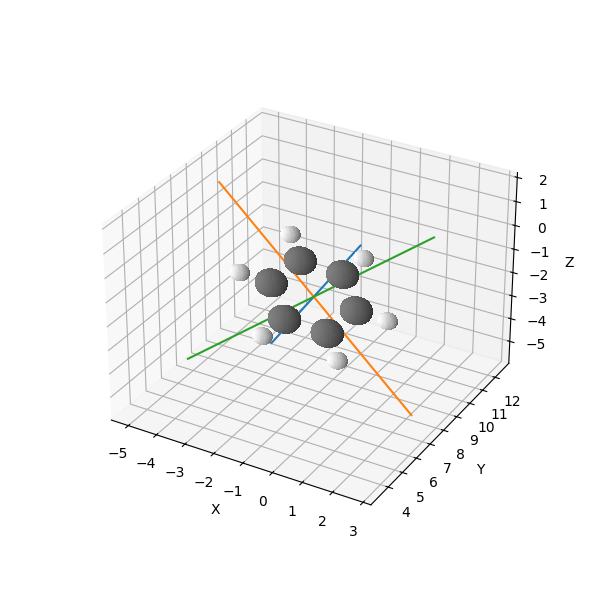

In [24]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

amu = {
        'H': 1.0079,
        'C': 12.0107
    }

def read(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        ele = []
        coord = []
        for line in lines[2:]:  
            parts = line.split()
            element = parts[0]
            coords = np.array([float(part) for part in parts[1:]])
            
            ele.append(element)
            coord.append(coords)
    
    e_array = np.array(ele)
    c_array = np.array(coord)
    
    return c_array, e_array

def COM(filename):
    coord, ele = read(filename)
    
    total_mass = 0
    weighted = np.zeros(3)  
    
    for element, coordinate in zip(ele, coord):
        mass = amu.get(element, 0) 
        total_mass += mass
        weighted += mass * coordinate 
        
    cof = weighted / total_mass
    
    return cof

def inertia_matrix(filename):
    com = COM(filename)
    coordinates, elements = read(filename)
    
    trans_coord = coordinates - com
    inertia = np.zeros((3, 3))
    
    for element, coord in zip(elements, trans_coord):
        mass = amu[element]
        x, y, z = coord
        
        inertia[0, 0] += mass * (y**2 + z**2)
        inertia[1, 1] += mass * (x**2 + z**2)
        inertia[2, 2] += mass * (x**2 + y**2)
        
        inertia[0, 1] -= mass * x * y
        inertia[1, 0] -= mass * x * y
        
        inertia[0, 2] -= mass * x * z
        inertia[2, 0] -= mass * x * z
        
        inertia[1, 2] -= mass * y * z
        inertia[2, 1] -= mass * y * z
    
    return inertia

def principal_moments_of_inertia(filename):
    inertia = inertia_matrix(filename)
    eigenvalues, eigenvectors = np.linalg.eig(inertia)
    return eigenvalues

# Plot the molecule
def plot_sphere(ax, center, radius, color):
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    x = center[0] + radius * np.cos(u) * np.sin(v)
    y = center[1] + radius * np.sin(u) * np.sin(v)
    z = center[2] + radius * np.cos(v)
    ax.plot_surface(x, y, z, color=color, edgecolor='none', rstride=1, cstride=1, linewidth=0, antialiased=False)

def plot_molecule_and_axes(filename):
    coordinates, elements = read(filename)
    com = COM(filename)
    inertia = inertia_matrix(filename)
    _, eigenvectors = np.linalg.eig(inertia)
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot atoms
    for coord, element in zip(coordinates, elements):
        if element == 'C':
            plot_sphere(ax, coord, 0.5, 'gray') 
        elif element == 'H':
            plot_sphere(ax, coord, 0.3, 'white')
    
    # Plot axes
    axes_colors = ['#2178b5', '#ff8111', '#2da02c']
    
    scale_factor = 5
    for i, color in zip(range(3), axes_colors):
        direction = eigenvectors[:, i]
        start_point = com - direction * scale_factor
        end_point = com + direction * scale_factor
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], color=color)
    
    ax.set_xticks(np.arange(-5, 4, 1))
    ax.set_yticks(np.arange(4, 13, 1))
    ax.set_zticks(np.arange(-5, 3, 1))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

plot_molecule_and_axes('benzene.xyz')
